In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam, Adadelta

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from google.colab import files
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing

%matplotlib inline


In [2]:
files.upload()
!ls

Saving cars_new.csv to cars_new.csv
Saving sonar.csv to sonar.csv
cars_new.csv  sample_data  sonar.csv


In [4]:
df = pd.read_csv('sonar.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
print(df.shape)

(208, 61)


In [6]:
dataset = df.values
X = dataset[:, :-1].astype(float)
Y = dataset[:, -1]
Y[Y=='R'] = '0'
Y[Y=='M'] = '1'
Y = Y.astype(int)

print(X.shape)
print(Y.shape)
print(Y)

(208, 60)
(208,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)


(166, 60)
(42, 60)
(166,)
(42,)


In [8]:
def create_model():

  model = Sequential()
  model.add(Dense(60, input_dim=60, activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

  return model

In [9]:
model = create_model()

model.fit(x_train, y_train, batch_size=8, epochs=100, verbose=1)


Epoch 1/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5783
Epoch 2/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6676 - accuracy: 0.5663
Epoch 3/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6349 - accuracy: 0.6928
Epoch 4/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6107 - accuracy: 0.6988
Epoch 5/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5796 - accuracy: 0.7349
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5495 - accuracy: 0.7289
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5141 - accuracy: 0.7711
Epoch 8/100
21/21 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 0.7711
Epoch 9/100
21/21 [==============================] - 0s 1ms/step - loss: 0.4482 - accuracy: 0.8133
Epoch 10/100
21/21 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.8012
Epoch 11/

In [10]:
model_1 = create_model()

model_1.fit(x_train, y_train, batch_size=8, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
17/17 [==============================] - 0s 11ms/step - loss: 0.6838 - accuracy: 0.5758 - val_loss: 0.6635 - val_accuracy: 0.6765
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6403 - accuracy: 0.7424 - val_loss: 0.6490 - val_accuracy: 0.6765
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6115 - accuracy: 0.7273 - val_loss: 0.6242 - val_accuracy: 0.7059
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5705 - accuracy: 0.7879 - val_loss: 0.6241 - val_accuracy: 0.6765
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5349 - accuracy: 0.8030 - val_loss: 0.5827 - val_accuracy: 0.7059
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.7803 - val_loss: 0.5658 - val_accuracy: 0.6765
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4612 - accuracy: 0.8106 - val_loss: 0.5476 - val_accuracy: 0.6765
Epoch 8/100


In [13]:
n_val = 40
x_len = x_train.shape[0]
model_2 = create_model()

model_2.fit(x_train[:-n_val], y_train[:-n_val], batch_size=8, epochs=100, 
            validation_data=(x_train[-n_val:], y_train[-n_val:]), verbose=1)

Epoch 1/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6681 - accuracy: 0.6508 - val_loss: 0.6654 - val_accuracy: 0.6250
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6400 - accuracy: 0.6667 - val_loss: 0.6640 - val_accuracy: 0.6500
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.6825 - val_loss: 0.6603 - val_accuracy: 0.6250
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5910 - accuracy: 0.7302 - val_loss: 0.6465 - val_accuracy: 0.6000
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5704 - accuracy: 0.7302 - val_loss: 0.6562 - val_accuracy: 0.5750
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.7778 - val_loss: 0.6247 - val_accuracy: 0.6000
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5120 - accuracy: 0.7619 - val_loss: 0.6101 - val_accuracy: 0.6500
Epoch 8/100
1

In [14]:
from sklearn.model_selection import train_test_split

x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size=0.2) 


print(x_train_new.shape)
print(x_val.shape)

print(y_train_new.shape)
print(y_val.shape)

model_3 = create_model()

model_3.fit(x_train_new, y_train_new, batch_size=8, epochs=100,
            validation_data=(x_val, y_val), verbose=True)



(132, 60)
(34, 60)
(132,)
(34,)
Epoch 1/100
17/17 [==============================] - 0s 8ms/step - loss: 0.6917 - accuracy: 0.5227 - val_loss: 0.6765 - val_accuracy: 0.5882
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.6136 - val_loss: 0.6568 - val_accuracy: 0.5882
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6316 - accuracy: 0.6515 - val_loss: 0.6208 - val_accuracy: 0.6765
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.6970 - val_loss: 0.5824 - val_accuracy: 0.6765
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5733 - accuracy: 0.7348 - val_loss: 0.5515 - val_accuracy: 0.7059
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.7652 - val_loss: 0.5120 - val_accuracy: 0.8235
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5257 - accuracy: 0.7803 - val_loss: 0.5167 - va

In [15]:
scores = model.evaluate(x_test, y_test, verbose=True)
print(scores)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 4), "%", sep="")

scores_1 = model_1.evaluate(x_test, y_test, verbose=True)
print(scores_1)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores_1[1] * 100, 4), "%", sep="")

scores_2 = model_2.evaluate(x_test, y_test, verbose=True)
print(scores_2)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores_2[1] * 100, 4), "%", sep="")

scores_3 = model_3.evaluate(x_val, y_val, verbose=True)
print(scores_3)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores_3[1] * 100, 4), "%", sep="")



2/2 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.7857
[0.6950587034225464, 0.7857142686843872]
Доля верных ответов на тестовых данных, в процентах: 78.5714%
2/2 [==============================] - 0s 2ms/step - loss: 0.5806 - accuracy: 0.7619
[0.5805520415306091, 0.761904776096344]
Доля верных ответов на тестовых данных, в процентах: 76.1905%
2/2 [==============================] - 0s 2ms/step - loss: 0.6074 - accuracy: 0.7619
[0.607416033744812, 0.761904776096344]
Доля верных ответов на тестовых данных, в процентах: 76.1905%
2/2 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.7647
[0.4259279668331146, 0.7647058963775635]
Доля верных ответов на тестовых данных, в процентах: 76.4706%


In [16]:
model_test = create_model()
history = model_test.fit(x_train, y_train, batch_size=8, 
                    epochs=100, validation_split=0.2, verbose=1)

print(history.history.keys())

Epoch 1/100
17/17 [==============================] - 0s 8ms/step - loss: 0.6903 - accuracy: 0.5455 - val_loss: 0.6666 - val_accuracy: 0.6471
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.6818 - val_loss: 0.6673 - val_accuracy: 0.5588
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.7576 - val_loss: 0.6581 - val_accuracy: 0.5588
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6089 - accuracy: 0.7955 - val_loss: 0.6288 - val_accuracy: 0.6471
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5798 - accuracy: 0.7500 - val_loss: 0.6258 - val_accuracy: 0.6176
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5484 - accuracy: 0.7803 - val_loss: 0.6034 - val_accuracy: 0.6176
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5255 - accuracy: 0.8030 - val_loss: 0.6024 - val_accuracy: 0.6471
Epoch 8/100
1

In [17]:
history.history['loss']

[0.6902970671653748,
 0.6607327461242676,
 0.6409326195716858,
 0.6089223027229309,
 0.5798379182815552,
 0.548445999622345,
 0.5255265831947327,
 0.49689599871635437,
 0.47630953788757324,
 0.459006130695343,
 0.42969807982444763,
 0.41011741757392883,
 0.3974074125289917,
 0.37943795323371887,
 0.38805896043777466,
 0.3567521274089813,
 0.36411377787590027,
 0.3422454297542572,
 0.32809245586395264,
 0.31787487864494324,
 0.3149900734424591,
 0.3132469058036804,
 0.30328553915023804,
 0.27821141481399536,
 0.31191110610961914,
 0.280362069606781,
 0.2623058557510376,
 0.25360631942749023,
 0.2579052746295929,
 0.2631821036338806,
 0.24779824912548065,
 0.2543203830718994,
 0.22955381870269775,
 0.21665917336940765,
 0.21481280028820038,
 0.2141803652048111,
 0.23151762783527374,
 0.2037895768880844,
 0.19409306347370148,
 0.18616829812526703,
 0.1975218653678894,
 0.1957671344280243,
 0.16671444475650787,
 0.16942323744297028,
 0.15435418486595154,
 0.15934127569198608,
 0.1502418816

In [18]:
val_acc = history.history['val_accuracy']
for i in range(len(val_acc)):
  print("Эпоха: ", i, " точность: ", round(100*val_acc[i], 1), "%", sep="")

Эпоха: 0 точность: 64.7%
Эпоха: 1 точность: 55.9%
Эпоха: 2 точность: 55.9%
Эпоха: 3 точность: 64.7%
Эпоха: 4 точность: 61.8%
Эпоха: 5 точность: 61.8%
Эпоха: 6 точность: 64.7%
Эпоха: 7 точность: 64.7%
Эпоха: 8 точность: 67.6%
Эпоха: 9 точность: 67.6%
Эпоха: 10 точность: 67.6%
Эпоха: 11 точность: 67.6%
Эпоха: 12 точность: 67.6%
Эпоха: 13 точность: 73.5%
Эпоха: 14 точность: 73.5%
Эпоха: 15 точность: 73.5%
Эпоха: 16 точность: 73.5%
Эпоха: 17 точность: 73.5%
Эпоха: 18 точность: 73.5%
Эпоха: 19 точность: 79.4%
Эпоха: 20 точность: 79.4%
Эпоха: 21 точность: 79.4%
Эпоха: 22 точность: 76.5%
Эпоха: 23 точность: 76.5%
Эпоха: 24 точность: 70.6%
Эпоха: 25 точность: 76.5%
Эпоха: 26 точность: 82.4%
Эпоха: 27 точность: 76.5%
Эпоха: 28 точность: 82.4%
Эпоха: 29 точность: 79.4%
Эпоха: 30 точность: 73.5%
Эпоха: 31 точность: 79.4%
Эпоха: 32 точность: 79.4%
Эпоха: 33 точность: 79.4%
Эпоха: 34 точность: 79.4%
Эпоха: 35 точность: 79.4%
Эпоха: 36 точность: 82.4%
Эпоха: 37 точность: 76.5%
Эпоха: 38 точность: 76

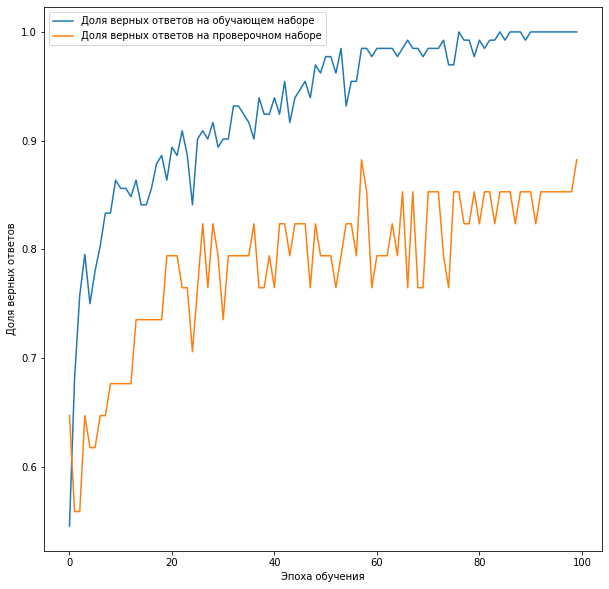

In [19]:
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')

plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

plt.legend()
plt.show()

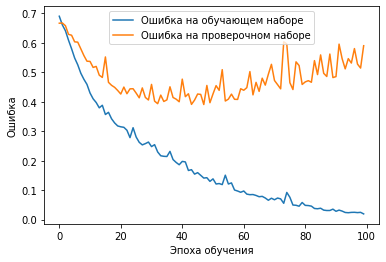

In [20]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [21]:
# Dropout
model = Sequential()
model.add(Dropout(0.3, input_shape=(60,)))
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


# lr=0.001 - размер шага обучения
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])


history = model.fit(x_train, y_train, batch_size=8, 
                      epochs=200, validation_split=0.2, verbose=1)

Epoch 1/200
17/17 [==============================] - 0s 8ms/step - loss: 0.7160 - accuracy: 0.4848 - val_loss: 0.6744 - val_accuracy: 0.7353
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5530 - val_loss: 0.6773 - val_accuracy: 0.6471
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.6061 - val_loss: 0.6686 - val_accuracy: 0.5882
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.5985 - val_loss: 0.6675 - val_accuracy: 0.5588
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.6667 - val_loss: 0.6661 - val_accuracy: 0.5882
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.6364 - val_loss: 0.6506 - val_accuracy: 0.6176
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6495 - accuracy: 0.6288 - val_loss: 0.6523 - val_accuracy: 0.6176
Epoch 8/200
1

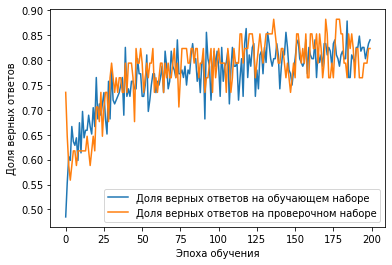

In [22]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

plt.legend()
plt.show()

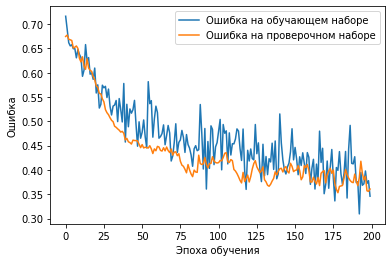

In [23]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [24]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.5175 - accuracy: 0.7619


[0.517516553401947, 0.761904776096344]

Epoch 1/100
1/1 [==============================] - 0s 150ms/step - loss: 0.6368 - accuracy: 0.5909 - val_loss: 0.6929 - val_accuracy: 0.5294
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 0.5907 - accuracy: 0.6742 - val_loss: 0.6879 - val_accuracy: 0.5294
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 0.5497 - accuracy: 0.7576 - val_loss: 0.6827 - val_accuracy: 0.6765
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 0.5134 - accuracy: 0.8106 - val_loss: 0.6776 - val_accuracy: 0.7059
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 0.4816 - accuracy: 0.8409 - val_loss: 0.6726 - val_accuracy: 0.6471
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 0.4534 - accuracy: 0.8485 - val_loss: 0.6680 - val_accuracy: 0.6765
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 0.4282 - accuracy: 0.8636 - val_loss: 0.6640 - val_accuracy: 0.6765
Epoch 8/100
1/1 [==

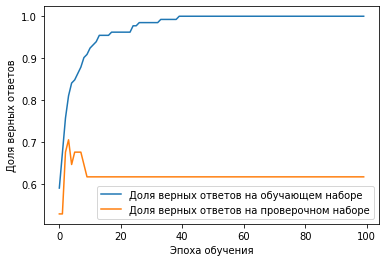

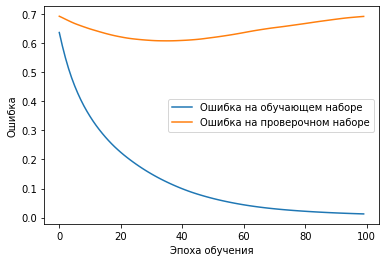

In [25]:
# Normalization

model = Sequential()

# Добавляем слой пакетной нормализации
# Теперь input_shape=(60, ) надо указывать в нём
# А не в первом полносвязном слое
model.add(BatchNormalization(input_shape=(60, )))
model.add(Dense(60, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train, 
                    batch_size=200, 
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

Epoch 1/100
1/1 [==============================] - 0s 157ms/step - loss: 1.0232 - accuracy: 0.4470 - val_loss: 0.7462 - val_accuracy: 0.3824
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 0.8616 - accuracy: 0.4773 - val_loss: 0.7416 - val_accuracy: 0.3824
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 0.8496 - accuracy: 0.5303 - val_loss: 0.7375 - val_accuracy: 0.3824
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 0.9260 - accuracy: 0.5303 - val_loss: 0.7325 - val_accuracy: 0.3824
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 0.7966 - accuracy: 0.5758 - val_loss: 0.7276 - val_accuracy: 0.3824
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 0.7052 - accuracy: 0.6439 - val_loss: 0.7229 - val_accuracy: 0.3824
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 0.7677 - accuracy: 0.5909 - val_loss: 0.7183 - val_accuracy: 0.3824
Epoch 8/100
1/1 [==

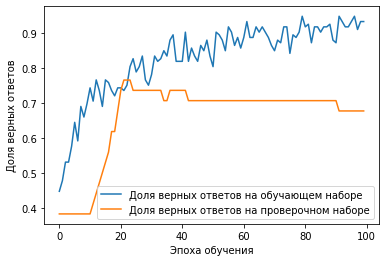

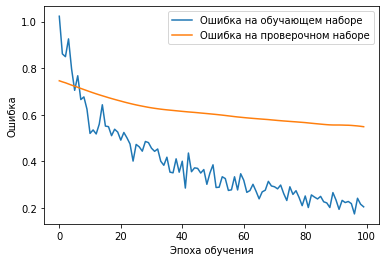

In [26]:
model = Sequential()

# Добавляем слой пакетной нормализации
# Теперь input_shape=(784, ) надо указывать в нём
# А не в первом полносвязном слое
model.add(Dense(60, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(30, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train, 
                    batch_size=200, 
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()